# EMAIL/SMS SPAM CLASSIFIER

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
email_data = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
email_data.head(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
email_data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [5]:
email_data.shape

(5572, 5)

# 1.Data Cleaning 

In [6]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
email_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
email_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
email_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
#renaming the cols
email_data.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
email_data.sample(5)

,target,text
3086,ham,So i asked how's anthony. Dad. And your bf
5024,ham,I was gonna ask you lol but i think its at 7
2283,ham,I reach home safe n sound liao...
47,ham,"Fair enough, anything going on?"
2826,ham,"Oh right, ok. I'll make sure that i do loads o..."


In [11]:
email_data.loc[3859,:]

target                                       ham
text      Yep. I do like the pink furniture tho.
Name: 3859, dtype: object

In [12]:
email_data.loc[88,:]

target                                           ham
text      I'm really not up to it still tonight babe
Name: 88, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
encoder.fit_transform(email_data["target"])

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
email_data["target"] = encoder.fit_transform(email_data["target"])

In [16]:
email_data.sample(5)

,target,text
984,0,Yo guess what I just dropped
4896,0,I cant pick the phone right now. Pls send a me...
3987,0,Hello. Sort of out in town already. That . So ...
2346,0,Its posible dnt live in &lt;#&gt; century cm ...
4823,0,Not thought bout it... || Drink in tap & spile...


In [17]:
email_data.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#check for duplicate valeus
email_data.duplicated().sum()

403

In [19]:
email_data.drop_duplicates()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
email_data = email_data.drop_duplicates()

In [21]:
email_data.duplicated().sum()

0

In [22]:
email_data.shape

(5169, 2)

In [23]:
email_data["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

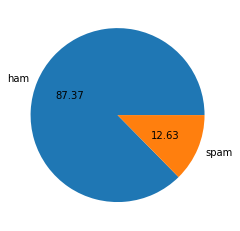

In [24]:
import matplotlib.pyplot as plt 
plt.pie(email_data["target"].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [25]:
import nltk #natural library tool kit 

In [26]:
nltk.download("punkt")
#nltk.download("punkt")is command used to download the Punkt tokenizer models,which are pre-trained models for tokenizing text.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# New Column: num of characters
email_data["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [28]:
email_data["num_characters"] = email_data["text"].apply(len)

In [29]:
email_data.sample(5)

,target,text,num_characters
2210,0,Just wanted to say holy shit you guys weren't ...,68
2487,0,K ill drink.pa then what doing. I need srs mod...,78
2228,0,Those were my exact intentions,30
2006,0,Shopping lor. Them raining mah hard 2 leave or...,52
2414,0,O was not into fps then.,24


In [30]:
# New Column: num of words 
email_data["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [31]:
email_data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [32]:
# New Column: num of words 
email_data["num_words"] = email_data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
email_data.sample(5)

,target,text,num_characters,num_words
2184,0,I know a few people I can hit up and fuck to t...,52,14
3941,0,She's borderline but yeah whatever.,35,7
5152,0,Idk. I'm sitting here in a stop and shop parki...,184,43
466,0,They don't put that stuff on the roads to keep...,83,18
395,0,From here after The performance award is calcu...,102,17


In [34]:
#New Column: Num Of Sentences 
email_data["num_sentences"] = email_data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
email_data.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
email_data.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [38]:
#for ham messages 
email_data[email_data["target"]==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [39]:
email_data[email_data["target"]==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

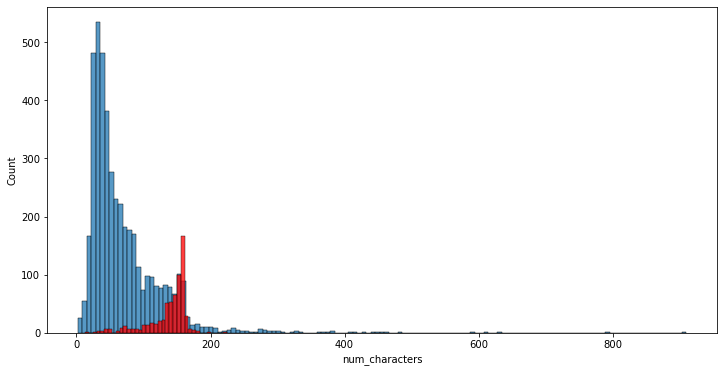

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(email_data[email_data["target"]==0]["num_characters"])
sns.histplot(email_data[email_data["target"]==1]["num_characters"],color="red")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

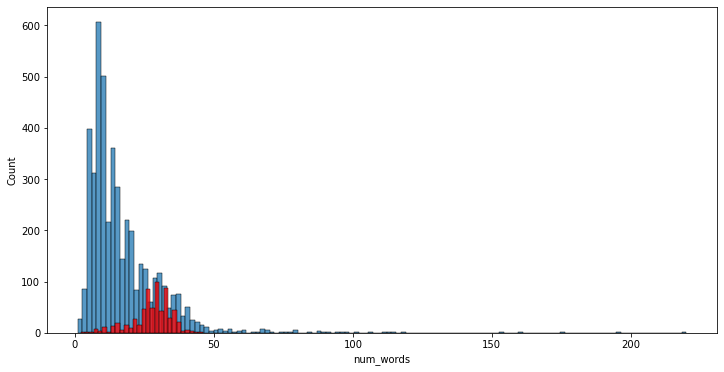

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(email_data[email_data["target"]==0]["num_words"])
sns.histplot(email_data[email_data["target"]==1]["num_words"],color="red")

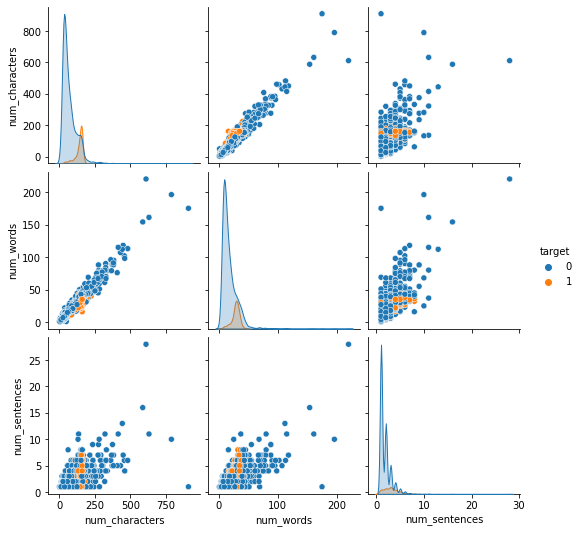

In [42]:
sns.pairplot(email_data, hue="target")

In [43]:
email_data.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

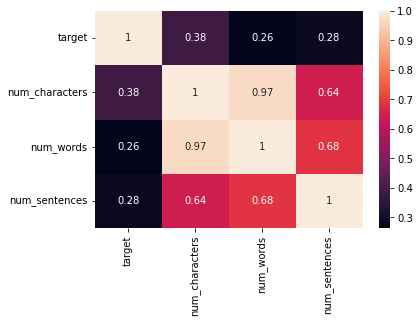

In [44]:
sns.heatmap(email_data.corr(), annot=True)

# 3. Data Preprocessing 

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [49]:
def transform_text(text):#####
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    txt = y[:]
    y.clear()
    for i in txt:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    txt2 = y[:]
    y.clear()
    for i in txt2:
        y.append(ps.stem(i))
    return " ".join(y)

In [50]:
email_data["text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [51]:
transform_text(email_data["text"].iloc[1])

'ok lar joke wif u oni'

In [52]:
email_data["text"].iloc[1]

'Ok lar... Joking wif u oni...'

In [53]:
email_data.loc[1, "text"]

'Ok lar... Joking wif u oni...'

In [54]:
transform_text(email_data["text"].iloc[1])

'ok lar joke wif u oni'

In [55]:
email_data["transformed_text"] = email_data["text"].apply(transform_text)

In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color="white")

In [57]:
#spam_wc = wc.generate(email_data[email_data["target"]==1]["transformed_text"].str.cat(sep= " ")) 
#plt.imshow(spam_wc)

In [58]:
#ham_wc = wc.generate(email_data[email_data["target"]==0]["transformed_text"].str.cat(sep= " ")) 
#plt.imshow(ham_wc)

In [ ]:
# Now we will check for top words in spam and ham

In [59]:
spam_words = []
for msg in email_data[email_data["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_words.append(word)

In [60]:
print(spam_words)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [61]:
from collections import Counter
dict_count = Counter(spam_words)

In [62]:
list_words = sorted(dict_count.items(), key = lambda item:item[1], reverse=True)

In [63]:
top_50_spam_words = list_words[0:50]

In [64]:
print(top_50_spam_words)

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45), ('custom', 42), ('messag', 42), ('guarante', 42), ('per', 41), ('chat', 38), ('tri', 37), ('msg', 35), ('draw', 35), ('number', 35), ('cs', 35), ('show', 33), ('today', 33), ('offer', 33), ('line', 33), ('go', 32), ('receiv', 31), ('want', 31), ('latest', 30), ('rington', 30), ('landlin', 30)]


In [65]:
print([word for word, freq in top_50_spam_words])

['call', 'free', '2', 'txt', 'text', 'u', 'ur', 'mobil', 'stop', 'repli', 'claim', '4', 'prize', 'get', 'new', 'servic', 'tone', 'send', 'urgent', 'nokia', 'contact', 'award', 'phone', 'cash', 'pleas', 'week', 'win', 'c', 'collect', 'min', 'custom', 'messag', 'guarante', 'per', 'chat', 'tri', 'msg', 'draw', 'number', 'cs', 'show', 'today', 'offer', 'line', 'go', 'receiv', 'want', 'latest', 'rington', 'landlin']


In [66]:
ham_words = []
for msg in email_data[email_data["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_words.append(word)

In [67]:
print(ham_words)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [68]:
from collections import Counter
dict_count_ham = Counter(ham_words)

In [69]:
print(dict_count_ham)

Counter({'u': 883, 'go': 404, 'get': 349, 'gt': 288, 'lt': 287, '2': 284, 'come': 275, 'got': 236, 'know': 236, 'like': 234, 'call': 233, 'time': 219, 'ok': 217, 'love': 216, 'good': 213, 'want': 208, 'ur': 197, 'day': 190, 'need': 170, 'one': 165, 'lor': 159, '4': 156, 'home': 152, 'think': 149, 'see': 147, 'take': 143, 'still': 143, 'da': 138, 'tell': 133, 'make': 129, 'say': 127, 'back': 127, 'today': 123, 'hope': 122, 'ask': 121, 'sorri': 121, 'n': 120, 'send': 120, 'r': 120, 'work': 118, 'dont': 118, 'meet': 112, 'hi': 111, 'well': 109, 'thing': 109, 'wat': 108, 'k': 107, 'much': 107, 'night': 107, 'oh': 106, 'miss': 106, 'happi': 104, 'give': 102, 'later': 100, 'hey': 100, 'great': 97, 'na': 96, 'wait': 96, 'way': 95, 'alreadi': 90, 'thank': 87, 'let': 86, 'yeah': 86, 'text': 85, 'feel': 83, 'realli': 83, 'pl': 83, 'wan': 81, 'dear': 81, 'right': 80, 'e': 77, 'even': 77, 'friend': 76, 'sure': 76, 'said': 76, 'co': 76, 'would': 75, 'leav': 75, 'lol': 74, 'babe': 74, 'pleas': 74, '

In [70]:
list_words_ham = sorted(dict_count_ham.items(), key = lambda item:item[1], reverse=True)

In [71]:
top_50_ham_words = list_words_ham[0:50]

In [72]:
print([word for word, freq in top_50_ham_words])

['u', 'go', 'get', 'gt', 'lt', '2', 'come', 'got', 'know', 'like', 'call', 'time', 'ok', 'love', 'good', 'want', 'ur', 'day', 'need', 'one', 'lor', '4', 'home', 'think', 'see', 'take', 'still', 'da', 'tell', 'make', 'say', 'back', 'today', 'hope', 'ask', 'sorri', 'n', 'send', 'r', 'work', 'dont', 'meet', 'hi', 'well', 'thing', 'wat', 'k', 'much', 'night', 'oh']


# Hypothesis testing 

# Spam messages tend to be longer than ham messages in terms of character count, word count, and number of sentences.


=== Testing Length Hypothesis ===

num_characters:
Ham mean: 70.46, Spam mean: 137.89
T-test p-value: 0.0000
Significant difference - Hypothesis supported

num_words:
Ham mean: 17.12, Spam mean: 27.67
T-test p-value: 0.0000
Significant difference - Hypothesis supported

num_sentences:
Ham mean: 1.80, Spam mean: 2.97
T-test p-value: 0.0000
Significant difference - Hypothesis supported


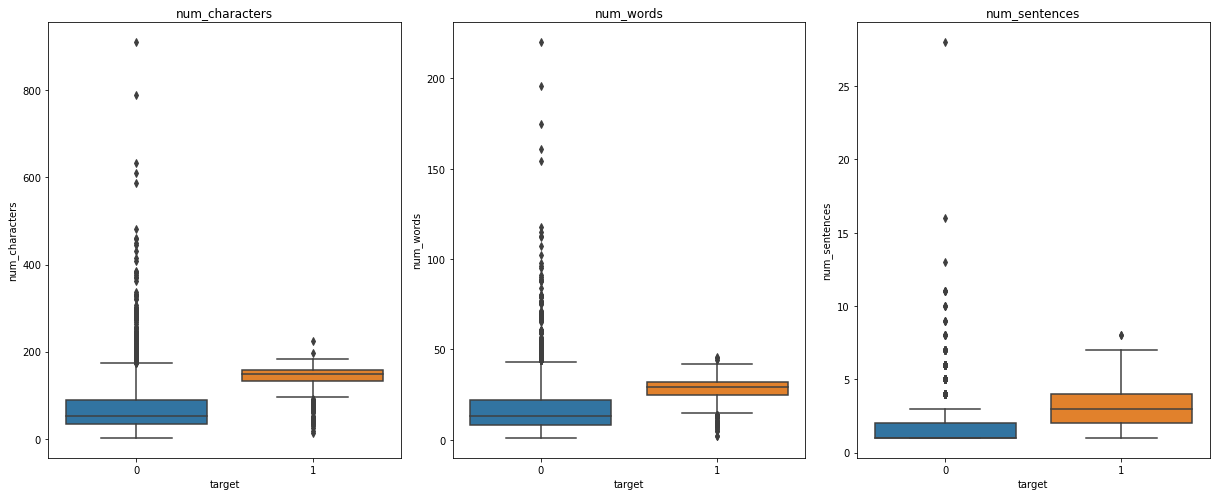

In [73]:
from scipy import stats
# Hypothesis 1: Length Hypothesis
def test_length_hypothesis(data):
    print("\n=== Testing Length Hypothesis ===")
    # Compare means
    for col in ['num_characters', 'num_words', 'num_sentences']:
        ham = data[data['target'] == 0][col]
        spam = data[data['target'] == 1][col]
        
        t_stat, p_val = stats.ttest_ind(spam, ham, equal_var=False)
        print(f"\n{col}:")
        print(f"Ham mean: {ham.mean():.2f}, Spam mean: {spam.mean():.2f}")
        print(f"T-test p-value: {p_val:.4f}")
        if p_val < 0.05:
            print("Significant difference - Hypothesis supported")
        else:
            print("No significant difference - Hypothesis not supported")
    plt.figure(figsize=(17, 7))
    for i, col in enumerate(['num_characters', 'num_words', 'num_sentences'], 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x='target', y=col, data=data)
        plt.title(col)
    plt.tight_layout()
    plt.show()
test_length_hypothesis(email_data)

# Certain words (like "free", "win", "prize", "call") appear more frequently in spam messages than in ham messages.

In [74]:
def test_word_frequency_hypothesis(data):
    print("\n=== Testing Word Frequency Hypothesis ===")
    from collections import Counter
    
    # Get top spam words
    spam_words = []
    for msg in data[data['target'] == 1]['transformed_text'].tolist():
        for word in msg.split():
            spam_words.append(word)
    
    spam_word_counts = Counter(spam_words)
    top_spam_words = [word for word, count in spam_word_counts.most_common(10)]
    
    # Get top ham words
    ham_words = []
    for msg in data[data['target'] == 0]['transformed_text'].tolist():
        for word in msg.split():
            ham_words.append(word)
    
    ham_word_counts = Counter(ham_words)
    top_ham_words = [word for word, count in ham_word_counts.most_common(10)]
    
    print("\nTop 10 Spam Words:", top_spam_words)
    print("Top 10 Ham Words:", top_ham_words)
test_word_frequency_hypothesis(email_data)


=== Testing Word Frequency Hypothesis ===

Top 10 Spam Words: ['call', 'free', '2', 'txt', 'text', 'u', 'ur', 'mobil', 'stop', 'repli']
Top 10 Ham Words: ['u', 'go', 'get', 'gt', 'lt', '2', 'come', 'got', 'know', 'like']


In [75]:
email_data["char_z"] = (email_data["num_characters"]-email_data["num_characters"].mean())/email_data["num_characters"].std()

In [76]:
email_data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,char_z
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,0.549864
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,-0.858192
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1.305407
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,-0.514764
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,-0.308707


In [77]:
email_data2 = email_data[(email_data["char_z"]<3) & (email_data["char_z"]>-3)]

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

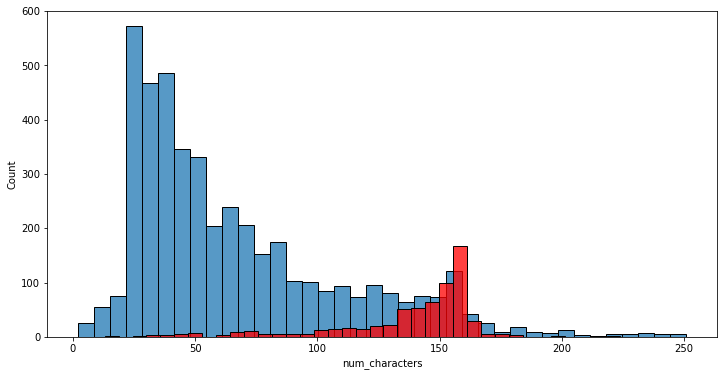

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(email_data2[email_data2["target"]==0]["num_characters"])
sns.histplot(email_data2[email_data2["target"]==1]["num_characters"],color="red")

# Modelling 

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [80]:
X = cv.fit_transform(email_data["transformed_text"])

In [81]:
print(X)

  (0, 2762)	1
  (0, 3393)	1
  (0, 4608)	1
  (0, 1806)	1
  (0, 1017)	1
  (0, 1385)	1
  (0, 2835)	1
  (0, 6556)	1
  (0, 3497)	1
  (0, 1383)	1
  (0, 1610)	1
  (0, 2801)	1
  (0, 837)	1
  (0, 6391)	1
  (1, 4289)	1
  (1, 3528)	1
  (1, 3364)	1
  (1, 6484)	1
  (1, 4312)	1
  (2, 2610)	1
  (2, 2291)	2
  (2, 6524)	1
  (2, 1695)	1
  (2, 6494)	1
  (2, 2404)	2
  :	:
  (5164, 132)	1
  (5164, 4222)	1
  (5165, 2762)	1
  (5165, 3041)	1
  (5165, 2599)	1
  (5165, 2321)	1
  (5166, 5702)	1
  (5166, 3992)	1
  (5166, 4553)	1
  (5167, 2610)	1
  (5167, 6421)	1
  (5167, 3602)	1
  (5167, 4147)	1
  (5167, 6240)	1
  (5167, 5457)	1
  (5167, 1410)	1
  (5167, 2250)	1
  (5167, 2696)	1
  (5167, 2879)	1
  (5167, 3240)	1
  (5167, 705)	1
  (5167, 1215)	1
  (5168, 4077)	1
  (5168, 6099)	1
  (5168, 5038)	1


In [82]:
x = cv.fit_transform(email_data["transformed_text"]).toarray()

In [83]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
print(x.shape)

(5169, 6708)


In [85]:
y = email_data["target"]
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32


In [86]:
y_ = email_data["target"].values
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32


In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [88]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [89]:
gnb.fit(x_train,y_train)

GaussianNB()

In [90]:
y_pred1 = gnb.predict(x_test)

In [91]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [92]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [93]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [96]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [97]:
clfs = {
    "SVC":svc,
    "KN":knc,
    "MNB":mnb,
    "GNB":gnb,
    "BNB":bnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,

}

In [98]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [99]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9332688588007737, 0.7676056338028169)

In [100]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy 0.9332688588007737
Precision 0.7676056338028169
For KN
Accuracy 0.9042553191489362
Precision 1.0
For MNB
Accuracy 0.9738878143133463
Precision 0.8881578947368421
For GNB
Accuracy 0.8684719535783365
Precision 0.5185185185185185
For BNB
Accuracy 0.9661508704061895
Precision 0.9661016949152542
For DT
Accuracy 0.9235976789168279
Precision 0.9230769230769231
For LR
Accuracy 0.9709864603481625
Precision 0.9457364341085271
For RF
Accuracy 0.9661508704061895
Precision 1.0


In [101]:
print(accuracy_scores)
print(precision_scores)

[0.9332688588007737, 0.9042553191489362, 0.9738878143133463, 0.8684719535783365, 0.9661508704061895, 0.9235976789168279, 0.9709864603481625, 0.9661508704061895]
[0.7676056338028169, 1.0, 0.8881578947368421, 0.5185185185185185, 0.9661016949152542, 0.9230769230769231, 0.9457364341085271, 1.0]


In [102]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores})

In [103]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.933269,0.767606
1,KN,0.904255,1.000000
2,MNB,0.973888,0.888158
3,GNB,0.868472,0.518519
4,BNB,0.966151,0.966102
5,DT,0.923598,0.923077
6,LR,0.970986,0.945736
7,RF,0.966151,1.000000


# Testing of MOdel

In [104]:
mnb.predict(x_test)[0:5]

array([0, 0, 0, 0, 0])

In [105]:
print(y_test)

1617    0
2064    0
1272    0
3020    0
3642    0
       ..
4146    0
1208    0
4795    1
3575    0
2820    0
Name: target, Length: 1034, dtype: int32


In [106]:
rfc.predict(x_test)[0:5]

array([0, 0, 0, 0, 0])